<a href="https://colab.research.google.com/github/alvarosello/DataScience2021-1/blob/main/Proyecto_2_Parte_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **MRI and Alzheimers**
### Magnetic Resonance Imaging Comparisons of Demented and Nondemented Adults
---

Link Kaggle: https://www.kaggle.com/jboysen/mri-and-alzheimers

Video presentación: https://www.kaggle.com/jboysen/mri-and-alzheimers

### **Contexto:**

El proyecto [Open Access Series of Imaging Studies (OASIS)](http://www.oasis-brains.org/) está destinado a hacer que los conjuntos de datos de resonancias magnéticas de cerebro estén disponibles gratuitamente para la comunidad científica. Mediante la recopilación y distribución gratuita de conjuntos de datos de RM (MRI en inglés), el proyecto espera facilitar futuros descubrimientos en neurociencia básica y clínica.

OASIS es una realidad gracias al Centro de Investigación de la Enfermedad de Alzheimer de la Universidad de Washington, el Dr. Randy Buckner en el [Instituto Médico Howard Hughes (HHMI)](http://www.hhmi.org/) (en la Universidad de Harvard, el [Grupo de Investigación de Neuroinformática (NRG)](http://nrg.wustl.edu/) en la Facultad de Medicina de la Universidad de Washington y la [Red de Investigación de Informática Biomédica (BIRN)](http://www.nbirn.net/).

### **Diccionario de datos**

* **Subject ID**: ID único del paciente
* **MRI ID**: ID único generada luego de realizar una resonancia magnética (MRI en el paciente)
* **Group**: Corresponde a las categorías de Convertidos (anteriormente normales pero desarrollaron demencia después), Dementes y No Dementes (pacientes normales)
* **Visit**: Número de visitas para detectar estado de demencia
* **MR Delay**: El tiempo de retraso anterior a la obtención de la imagen en una resonancia magnética
* **M/F**: Género (masculino o femenino)
* **Hand**: Mano dominante (izquierda o derecha)
* **Age**: Edad (en años) del paciente durante el escaneo
* **EDUC**: Años de educación
* **SES**: Nivel socioeconómico evaluado por el índice de posición social de Hollingshead y clasificado en categorías de 1 (más alto) a 5 (más bajo)
* **MMSE**: Mini-Mental State Examination score (el rango es de `0 = peor` a `30 = mejor`)
* **CDR**: Clasificación de demencia clínica o *Clinical Dementia Rating* (`0 = sin demencia`, `0,5 = Alzheimer muy leve`, `1 = Alzheimer leve`, `2 = Alzheimer moderado`)
* **eTIV**: Volumen intracraneal total estimado (en mm3)
* **nWBV**: Volumen normalizado de todo el cerebro, expresado como porcentaje de todos los vóxeles en la imagen enmascarada que están etiquetados como materia gris o blanca por el proceso automatizado de segmentación de tejidos
* **ASF**: Factor de escala Atlas (sin unidades). Factor de escala calculado que transforma el cerebro y el cráneo del espacio nativo en el objetivo del atlas (es decir, el determinante de la matriz de transformación)

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
# Pre-processing imports
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [5]:
# Cargar el dataset
file = '/content/drive/MyDrive/Coding Dojo/Datasets/Alzheimer/oasis_longitudinal.csv'
df = pd.read_csv(file)
df.head()

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,R,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,R,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,OAS2_0002,OAS2_0002_MR2,Demented,2,560,M,R,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,OAS2_0002,OAS2_0002_MR3,Demented,3,1895,M,R,80,12,NaN,22.0,0.5,1698,0.701,1.034


### **Pre-procesamiento**

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 373 entries, 0 to 372
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Subject ID  373 non-null    object 
 1   MRI ID      373 non-null    object 
 2   Group       373 non-null    object 
 3   Visit       373 non-null    int64  
 4   MR Delay    373 non-null    int64  
 5   M/F         373 non-null    object 
 6   Hand        373 non-null    object 
 7   Age         373 non-null    int64  
 8   EDUC        373 non-null    int64  
 9   SES         354 non-null    float64
 10  MMSE        371 non-null    float64
 11  CDR         373 non-null    float64
 12  eTIV        373 non-null    int64  
 13  nWBV        373 non-null    float64
 14  ASF         373 non-null    float64
dtypes: float64(5), int64(5), object(5)
memory usage: 43.8+ KB


In [7]:
# Chequear valores nulos
df.isnull().sum().sort_values(ascending=False)

SES           19
MMSE           2
Subject ID     0
MRI ID         0
Group          0
Visit          0
MR Delay       0
M/F            0
Hand           0
Age            0
EDUC           0
CDR            0
eTIV           0
nWBV           0
ASF            0
dtype: int64

Hay 19 valores perdidos en la columna SES (Nivel socioeconómico) y 2 valores perdidos en la columna MMSE (Mini-Mental State Examination score). Haremos un poco de investigación en cada una para determinar la mejor manera de tratar estos datos perdidos.

In [8]:
df['SES'].value_counts(dropna=False)

2.0    103
1.0     88
3.0     82
4.0     74
NaN     19
5.0      7
Name: SES, dtype: int64

In [9]:
correlation_matrix = df.corr()
correlation_matrix['SES'].sort_values(ascending=False)

SES         1.000000
ASF         0.255576
nWBV        0.090095
CDR         0.076160
MR Delay   -0.030813
Age        -0.046857
Visit      -0.051622
MMSE       -0.149219
eTIV       -0.261575
EDUC       -0.722647
Name: SES, dtype: float64

Existe una alta correlación (negativa) entre Nivel Socioeconómico (SES) y años de educación (EDUC), así que procederemos a ver cómo están relacionadas estas variables.

In [10]:
df.groupby(['SES'])[['EDUC']].mean().reset_index()

,SES,EDUC
0,1.0,17.340909
1,2.0,15.446602
2,3.0,13.987805
3,4.0,11.959459
4,5.0,8.000000


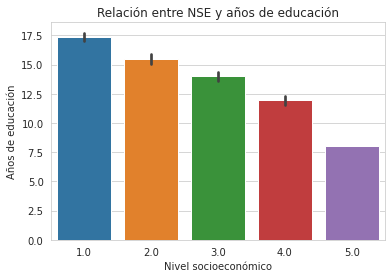

In [11]:
sns.set_style('whitegrid')
sns.barplot(x=df['SES'], y=df['EDUC'])
plt.xlabel('Nivel socioeconómico')
plt.ylabel('Años de educación')
plt.title('Relación entre NSE y años de educación');

De acuerdo a nuestro dataset podemos ver que, en promedio, mientras más años de educación, más alto es el nivel socioeconómico.

Ahora veremos dónde están ubicados nuestros valores perdidos en relación a los años de educación.

In [12]:
df.groupby(['EDUC']).SES.value_counts(dropna=False).to_frame()

SES
EDUC SES     
6    4.0    3
8    5.0    7
     4.0    2
11   4.0   11
12   4.0   42
     3.0   32
     NaN   16
     2.0   13
13   2.0   17
     4.0    6
     3.0    4
14   3.0   14
     2.0   11
     4.0    5
     1.0    3
15   2.0   12
     3.0    3
     4.0    2
16   1.0   36
     3.0   25
     2.0   14
     NaN    3
     4.0    3
17   1.0    7
     3.0    2
18   2.0   32
     1.0   30
     3.0    2
20   1.0    9
     2.0    4
23   1.0    3

Faltan datos de SES para pacientes con 12 y 16 años de educación.

In [13]:
df.groupby(['EDUC'])[['SES']].mean().reset_index()

,EDUC,SES
0,6,4.000000
1,8,4.777778
2,11,4.000000
3,12,3.333333
4,13,2.592593
5,14,2.636364
6,15,2.411765
7,16,1.935897
8,17,1.444444
9,18,1.562500


De acuerdo a nuestro dataset, para 12 años de educación el nivel socioeconómico promedio es 3 (3,33) y para 16 años de educaación el nivel socioeconómico promedio es 2 (1,93). Procederemos a llenar los faltantes con este criterio.

In [14]:
df['SES'].value_counts(dropna=False)

2.0    103
1.0     88
3.0     82
4.0     74
NaN     19
5.0      7
Name: SES, dtype: int64

In [15]:
df['SES'] = df['SES'].fillna(df.groupby('EDUC')['SES'].transform('mean').round())

Utilizamos `round()` para que los valores faltantes no se llenen como decimales sino que como enteros, haciendo sentido de los datos existentes en la columna SES.

In [16]:
df['SES'].value_counts(dropna=False)

2.0    106
3.0     98
1.0     88
4.0     74
5.0      7
Name: SES, dtype: int64

Ya resolvimos los faltantes en SES, procederemos a revisar aquellos en MMSE.

In [17]:
# Chequear valores nulos
df.isnull().sum().sort_values(ascending=False)

MMSE          2
Subject ID    0
MRI ID        0
Group         0
Visit         0
MR Delay      0
M/F           0
Hand          0
Age           0
EDUC          0
SES           0
CDR           0
eTIV          0
nWBV          0
ASF           0
dtype: int64

In [18]:
correlation_matrix['MMSE'].sort_values(ascending=False).to_frame()

,MMSE
MMSE,1.000000
nWBV,0.341912
EDUC,0.194884
MR Delay,0.065844
Age,0.055612
ASF,0.040052
Visit,-0.029078
eTIV,-0.032084
SES,-0.149219
CDR,-0.686519


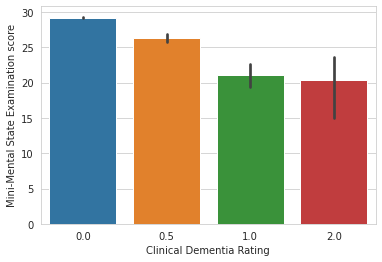

In [19]:
sns.barplot(x=df['CDR'], y=df['MMSE'])
plt.xlabel('Clinical Dementia Rating')
plt.ylabel('Mini-Mental State Examination score');

Existe una alta correlación (negativa) entre MMSE y CDR. A menor clasificación de *Clinical Dementia Rating* (`0 = sin demencia`, `0,5 = Alzheimer muy leve`, `1 = Alzheimer leve`, `2 = Alzheimer moderado`), más altos son los puntajes de Mini-Mental State Examination score (recordemos que el rango de esta variable es de `0 = peor` a `30 = mejor`).

In [20]:
df.groupby(['CDR']).MMSE.value_counts(dropna=False).to_frame()

MMSE
CDR MMSE      
0.0 30.0    97
    29.0    72
    28.0    26
    27.0     9
    25.0     1
    26.0     1
0.5 26.0    18
    28.0    18
    29.0    18
    27.0    17
    30.0    16
    25.0     9
    23.0     8
    20.0     4
    21.0     4
    22.0     4
    24.0     4
    17.0     2
    18.0     1
1.0 21.0     6
    27.0     6
    16.0     3
    17.0     3
    19.0     3
    20.0     3
    22.0     3
    23.0     3
    NaN      2
    4.0      1
    7.0      1
    15.0     1
    18.0     1
    25.0     1
    26.0     1
    28.0     1
    29.0     1
    30.0     1
2.0 15.0     1
    21.0     1
    25.0     1

Faltan datos de MMSE para 2 pacientes con un CDR de 1

In [21]:
df.groupby(['CDR'])[['MMSE']].mean().reset_index()

,CDR,MMSE
0,0.0,29.223301
1,0.5,26.357724
2,1.0,21.051282
3,2.0,20.333333


De acuerdo a nuestro dataset, para pacientes con CDR de 1 (demencia leve) el promedio del puntaje del MMSE es 21 (21,05). Procederemos a llenar los faltantes con este criterio.

In [22]:
df['MMSE'] = df['MMSE'].fillna(df.groupby('CDR')['MMSE'].transform('mean').round())

In [23]:
df['MMSE'].value_counts(dropna=False)

30.0    114
29.0     91
28.0     45
27.0     32
26.0     20
21.0     13
25.0     12
23.0     11
22.0      7
20.0      7
17.0      5
24.0      4
16.0      3
19.0      3
15.0      2
18.0      2
7.0       1
4.0       1
Name: MMSE, dtype: int64

In [24]:
# Chequear valores nulos
df.isnull().sum().sort_values(ascending=False)

Subject ID    0
MRI ID        0
Group         0
Visit         0
MR Delay      0
M/F           0
Hand          0
Age           0
EDUC          0
SES           0
MMSE          0
CDR           0
eTIV          0
nWBV          0
ASF           0
dtype: int64

In [25]:
# Chequear duplicados
df.duplicated().sum()

0

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 373 entries, 0 to 372
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Subject ID  373 non-null    object 
 1   MRI ID      373 non-null    object 
 2   Group       373 non-null    object 
 3   Visit       373 non-null    int64  
 4   MR Delay    373 non-null    int64  
 5   M/F         373 non-null    object 
 6   Hand        373 non-null    object 
 7   Age         373 non-null    int64  
 8   EDUC        373 non-null    int64  
 9   SES         373 non-null    float64
 10  MMSE        373 non-null    float64
 11  CDR         373 non-null    float64
 12  eTIV        373 non-null    int64  
 13  nWBV        373 non-null    float64
 14  ASF         373 non-null    float64
dtypes: float64(5), int64(5), object(5)
memory usage: 43.8+ KB


In [27]:
df['CDR'].value_counts()

0.0    206
0.5    123
1.0     41
2.0      3
Name: CDR, dtype: int64

In [28]:
df['Group'].value_counts()

Nondemented    190
Demented       146
Converted       37
Name: Group, dtype: int64

### **Visualizaciones**

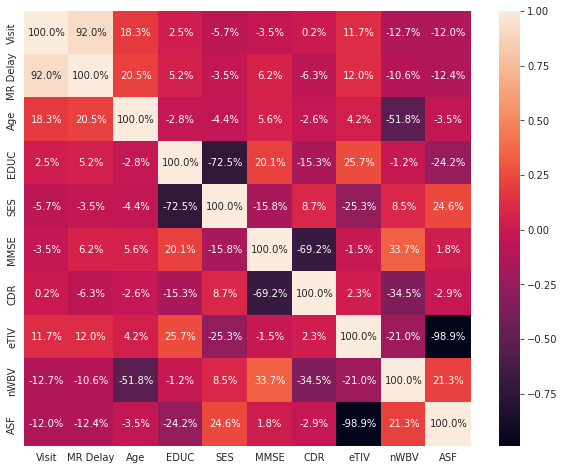

In [29]:
plt.figure(figsize = (10,8))
sns.heatmap(df.corr(), annot=True, fmt='.1%');

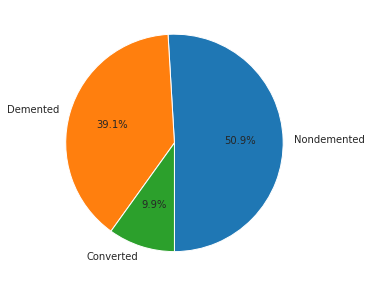

In [30]:
plt.figure(figsize=(5,5))
plt.pie(df['Group'].value_counts(), labels=df['Group'].value_counts().index, autopct='%.1f%%', startangle=-90);

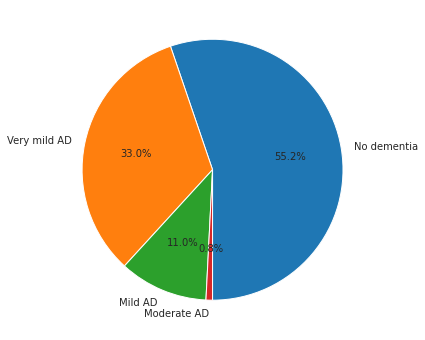

In [31]:
plt.figure(figsize=(6,6))
plt.pie(df['CDR'].value_counts(), labels=['No dementia', 'Very mild AD', 'Mild AD', 'Moderate AD'], autopct='%.1f%%', startangle=-90);

In [32]:
df['CDR'].value_counts(normalize=True)

0.0    0.552279
0.5    0.329759
1.0    0.109920
2.0    0.008043
Name: CDR, dtype: float64

Decidimos que nuestro objetivo será la columna CDR dado que es más explicativa respecto a los niveles de demencia de una persona. Sin embargo, los datos de esta columna están muy desbalanceados, por lo que deberemos estratificar.

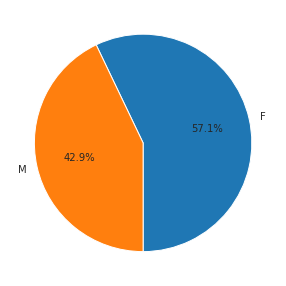

In [33]:
plt.figure(figsize=(5,5))
plt.pie(df['M/F'].value_counts(), labels=df['M/F'].value_counts().index, autopct='%.1f%%', startangle=-90);

Hay más mujeres que hombres en el dataset (57,1% vs 42,9%)

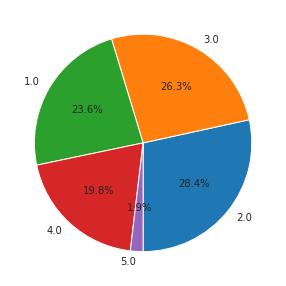

In [34]:
plt.figure(figsize=(5,5))
plt.pie(df['SES'].value_counts(), labels=df['SES'].value_counts().index, autopct='%.1f%%', startangle=-90);

Hay poca representación del estrato socioeconómico más bajo (5) en la muestra (1,9%)

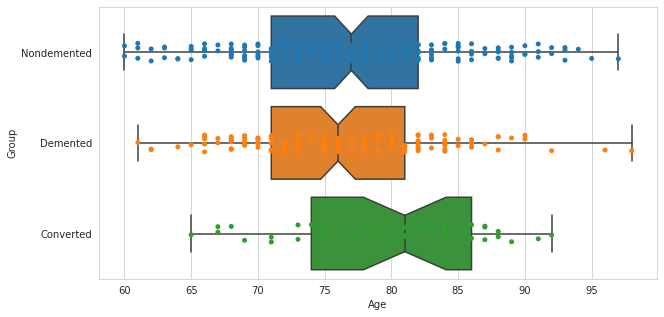

In [35]:
plt.figure(figsize=(10,5))
sns.boxplot(x=df['Age'], y=df['Group'], notch=True, whis=[0, 100])
sns.stripplot(x=df['Age'], y=df['Group']);

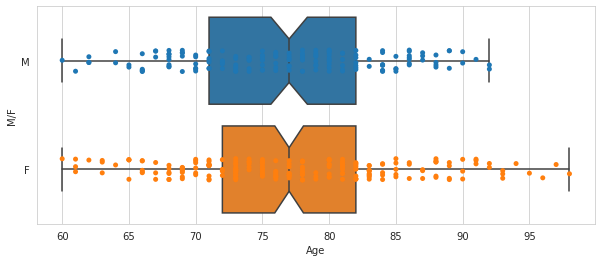

In [36]:
plt.figure(figsize=(10,4))
sns.boxplot(x=df['Age'], y=df['M/F'], notch=True, whis=[0, 100])
sns.stripplot(x=df['Age'], y=df['M/F']);

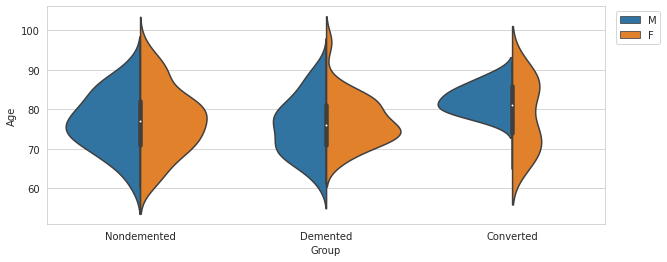

In [37]:
plt.figure(figsize=(10,4))
sns.violinplot(x='Group', y='Age', hue='M/F', split=True, data=df)
plt.legend(bbox_to_anchor=(1.01,1), loc="upper left");

In [38]:
df.groupby(['Group']).CDR.value_counts(dropna=False).to_frame()

CDR
Group       CDR     
Converted   0.5   19
            0.0   18
Demented    0.5  102
            1.0   41
            2.0    3
Nondemented 0.0  188
            0.5    2

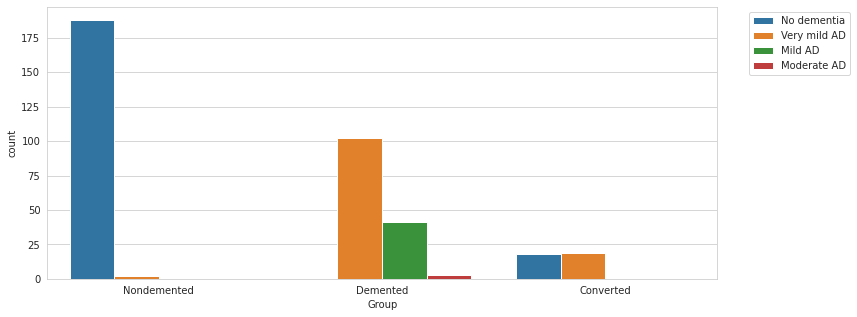

In [39]:
plt.figure(figsize=(12,5))
sns.countplot(x='Group', hue='CDR', data=df)
plt.legend(labels=['No dementia', 'Very mild AD', 'Mild AD', 'Moderate AD'], bbox_to_anchor=(1.04,1), loc="upper left");

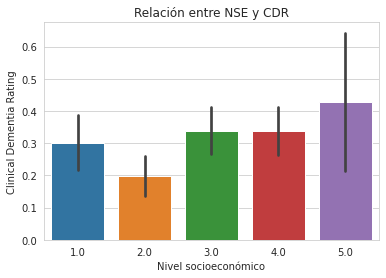

In [40]:
sns.barplot(x=df['SES'], y=df['CDR'])
plt.xlabel('Nivel socioeconómico')
plt.ylabel('Clinical Dementia Rating')
plt.title('Relación entre NSE y CDR');

A menor nivel socioeconómico, mayores puntajes de demencia. Incluso cuando este segmento está tan poco representado en la muestra (1,9%).

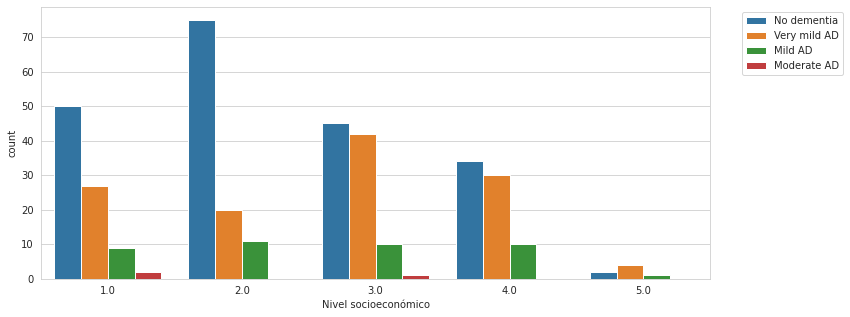

In [41]:
plt.figure(figsize=(12,5))
sns.countplot(x='SES', hue='CDR', data=df)
plt.xlabel('Nivel socioeconómico')
plt.legend(labels=['No dementia', 'Very mild AD', 'Mild AD', 'Moderate AD'], bbox_to_anchor=(1.04,1), loc="upper left");

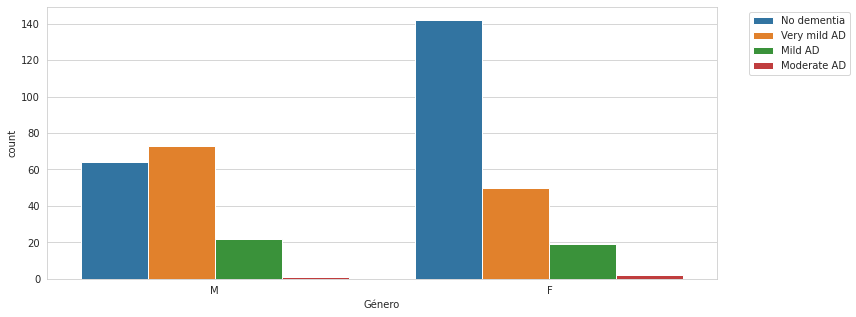

In [42]:
plt.figure(figsize=(12,5))
sns.countplot(x='M/F', hue='CDR', data=df)
plt.xlabel('Género')
plt.legend(labels=['No dementia', 'Very mild AD', 'Mild AD', 'Moderate AD'], bbox_to_anchor=(1.04,1), loc="upper left");

En general, las mujeres presentan menos demencia que los hombres.

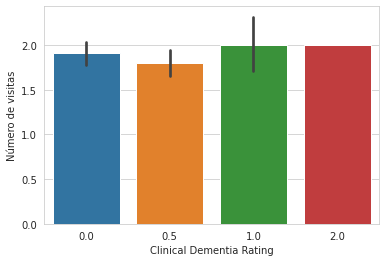

In [43]:
sns.barplot(x=df['CDR'], y=df['Visit'])
plt.xlabel('Clinical Dementia Rating')
plt.ylabel('Número de visitas');

Generalmente a la segunda visita ya se puede detectar el estado de demencia que presentan los pacientes.

In [44]:
correlation_matrix = df.corr()
correlation_matrix['Visit'].sort_values(ascending=False)

Visit       1.000000
MR Delay    0.920009
Age         0.183213
eTIV        0.117428
EDUC        0.024615
CDR         0.002325
MMSE       -0.034959
SES        -0.057384
ASF        -0.120399
nWBV       -0.126682
Name: Visit, dtype: float64

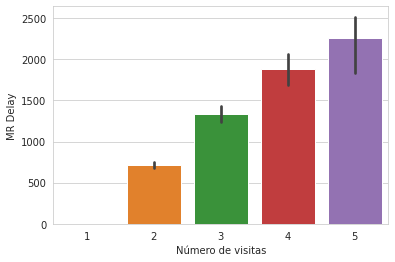

In [45]:
sns.barplot(x=df['Visit'], y=df['MR Delay'])
plt.xlabel('Número de visitas')
plt.ylabel('MR Delay');

### **Preparación de los datos para modelamiento**

In [46]:
# Veamos las estadísticas resumidas de las columnas numéricas
df.describe(include=[np.number])

,Visit,MR Delay,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
count,373.000000,373.000000,373.000000,373.000000,373.000000,373.000000,373.000000,373.000000,373.000000,373.000000
mean,1.882038,595.104558,77.013405,14.597855,2.479893,27.308311,0.290885,1488.128686,0.729568,1.195461
std,0.922843,635.485118,7.640957,2.876339,1.110917,3.702493,0.374557,176.139286,0.037135,0.138092
min,1.000000,0.000000,60.000000,6.000000,1.000000,4.000000,0.000000,1106.000000,0.644000,0.876000
25%,1.000000,0.000000,71.000000,12.000000,2.000000,27.000000,0.000000,1357.000000,0.700000,1.099000
50%,2.000000,552.000000,77.000000,15.000000,2.000000,29.000000,0.000000,1470.000000,0.729000,1.194000
75%,2.000000,873.000000,82.000000,16.000000,3.000000,30.000000,0.500000,1597.000000,0.756000,1.293000
max,5.000000,2639.000000,98.000000,23.000000,5.000000,30.000000,2.000000,2004.000000,0.837000,1.587000


In [47]:
# Veamos las estadísticas resumidas de las columnas categóricas
df.describe(include=[np.object])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


,Subject ID,MRI ID,Group,M/F,Hand
count,373,373,373,373,373
unique,150,373,3,2,1
top,OAS2_0070,OAS2_0001_MR1,Nondemented,F,R
freq,5,1,190,213,373


Después de ver las estadísticas resumidas, observamos que la columna `Hand` tiene solo un valor único (R). Por otro lado, la identificación del sujeto y la identificación de resonancia magnética no son útiles en nuestro análisis, por lo que eliminaremos estas tres columnas del conjunto de datos.

In [48]:
df = df.drop(columns=['Subject ID', 'MRI ID', 'Hand'], axis=1)
df.head()

,Group,Visit,MR Delay,M/F,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,Nondemented,1,0,M,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,Nondemented,2,457,M,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,Demented,1,0,M,75,12,3.0,23.0,0.5,1678,0.736,1.046
3,Demented,2,560,M,76,12,3.0,28.0,0.5,1738,0.713,1.010
4,Demented,3,1895,M,80,12,3.0,22.0,0.5,1698,0.701,1.034


In [49]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [50]:
# Codificar objetivo
df['CDR'] = encoder.fit_transform(df['CDR'])
df.head()

,Group,Visit,MR Delay,M/F,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,Nondemented,1,0,M,87,14,2.0,27.0,0,1987,0.696,0.883
1,Nondemented,2,457,M,88,14,2.0,30.0,0,2004,0.681,0.876
2,Demented,1,0,M,75,12,3.0,23.0,1,1678,0.736,1.046
3,Demented,2,560,M,76,12,3.0,28.0,1,1738,0.713,1.010
4,Demented,3,1895,M,80,12,3.0,22.0,1,1698,0.701,1.034


In [51]:
df = pd.get_dummies(df)
df.head()

,Visit,MR Delay,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF,Group_Converted,Group_Demented,Group_Nondemented,M/F_F,M/F_M
0,1,0,87,14,2.0,27.0,0,1987,0.696,0.883,0,0,1,0,1
1,2,457,88,14,2.0,30.0,0,2004,0.681,0.876,0,0,1,0,1
2,1,0,75,12,3.0,23.0,1,1678,0.736,1.046,0,1,0,0,1
3,2,560,76,12,3.0,28.0,1,1738,0.713,1.010,0,1,0,0,1
4,3,1895,80,12,3.0,22.0,1,1698,0.701,1.034,0,1,0,0,1


### **Modelamiento**

In [52]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import recall_score, classification_report
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, BaggingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multiclass import OneVsOneClassifier

In [53]:
# Guardar X datos
X = df.drop(columns = 'CDR')
# Codificar nuestro objetivo
y = df['CDR']

In [54]:
# División entrenamiento prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=3, stratify=y, test_size=0.3) 

In [55]:
# Gradient Boosting
gbc = GradientBoostingClassifier()
gbc.fit(X_train, y_train)
# Evaluar modelo
preds = gbc.predict(X_test)
print(classification_report(y_test, preds, digits=4, zero_division=0))
print('Training accuracy: %0.4f' % (gbc.score(X_train, y_train)))
# Cross validation
scores = cross_val_score(gbc, X, y, cv=3)
print("Cross validation: %0.4f accuracy with a standard deviation of %0.4f" % (scores.mean(), scores.std()))


              precision    recall  f1-score   support

           0     0.9683    0.9839    0.9760        62
           1     0.8387    0.7027    0.7647        37
           2     0.4444    0.6667    0.5333        12
           3     0.0000    0.0000    0.0000         1

    accuracy                         0.8482       112
   macro avg     0.5629    0.5883    0.5685       112
weighted avg     0.8607    0.8482    0.8501       112

Training accuracy: 1.0000
Cross validation: 0.8580 accuracy with a standard deviation of 0.0195


In [56]:
# LightGBM
lgbm = LGBMClassifier()
lgbm.fit(X_train, y_train)
# Evaluar modelo
preds = lgbm.predict(X_test)
print(classification_report(y_test, preds, digits=4, zero_division=0))
print('Training accuracy: %0.4f' % (lgbm.score(X_train, y_train)))
# Cross validation
scores = cross_val_score(lgbm, X, y, cv=3)
print("Cross validation: %0.4f accuracy with a standard deviation of %0.4f" % (scores.mean(), scores.std()))

              precision    recall  f1-score   support

           0     0.9531    0.9839    0.9683        62
           1     0.8519    0.6216    0.7187        37
           2     0.4286    0.7500    0.5455        12
           3     0.0000    0.0000    0.0000         1

    accuracy                         0.8304       112
   macro avg     0.5584    0.5889    0.5581       112
weighted avg     0.8550    0.8304    0.8319       112

Training accuracy: 1.0000
Cross validation: 0.8660 accuracy with a standard deviation of 0.0270


In [57]:
# XGBoost
xgb = XGBClassifier()
xgb.fit(X_train, y_train)
# Evaluar modelo
preds = xgb.predict(X_test)
print(classification_report(y_test, preds, digits=4, zero_division=0))
print('Training accuracy: %0.4f' % (xgb.score(X_train, y_train)))
# Cross validation
scores = cross_val_score(xgb, X, y, cv=3)
print("Cross validation: %0.4f accuracy with a standard deviation of %0.4f" % (scores.mean(), scores.std()))

              precision    recall  f1-score   support

           0     0.9839    0.9839    0.9839        62
           1     0.8182    0.7297    0.7714        37
           2     0.4118    0.5833    0.4828        12
           3     0.0000    0.0000    0.0000         1

    accuracy                         0.8482       112
   macro avg     0.5535    0.5742    0.5595       112
weighted avg     0.8591    0.8482    0.8512       112

Training accuracy: 1.0000
Cross validation: 0.8741 accuracy with a standard deviation of 0.0184


In [58]:
# AdaBoost
adb = AdaBoostClassifier()
adb.fit(X_train, y_train)
# Evaluar modelo
preds = adb.predict(X_test)
print(classification_report(y_test, preds, digits=4, zero_division=0))
print('Training accuracy: %0.4f' % (adb.score(X_train, y_train)))
# Cross validation
scores = cross_val_score(adb, X, y, cv=3)
print("Cross validation: %0.4f accuracy with a standard deviation of %0.4f" % (scores.mean(), scores.std()))

              precision    recall  f1-score   support

           0     1.0000    0.8226    0.9027        62
           1     0.5862    0.9189    0.7158        37
           2     0.0000    0.0000    0.0000        12
           3     0.0000    0.0000    0.0000         1

    accuracy                         0.7589       112
   macro avg     0.3966    0.4354    0.4046       112
weighted avg     0.7472    0.7589    0.7362       112

Training accuracy: 0.7433
Cross validation: 0.6218 accuracy with a standard deviation of 0.1286


In [59]:
# KNN
KNN_pipe = make_pipeline(StandardScaler(), KNeighborsClassifier())
KNN_pipe.fit(X_train, y_train)
# Evaluar modelo
preds = KNN_pipe.predict(X_test)
print(classification_report(y_test, preds, digits=4, zero_division=0))
print('Training accuracy: %0.4f' % (KNN_pipe.score(X_train, y_train)))
# Cross validation
scores = cross_val_score(KNN_pipe, X, y, cv=3)
print("Cross validation: %0.4f accuracy with a standard deviation of %0.4f" % (scores.mean(), scores.std()))

              precision    recall  f1-score   support

           0     0.9531    0.9839    0.9683        62
           1     0.8485    0.7568    0.8000        37
           2     0.5333    0.6667    0.5926        12
           3     0.0000    0.0000    0.0000         1

    accuracy                         0.8661       112
   macro avg     0.5837    0.6018    0.5902       112
weighted avg     0.8651    0.8661    0.8638       112

Training accuracy: 0.9310
Cross validation: 0.8606 accuracy with a standard deviation of 0.0146


In [60]:
# Bagged Trees
bt = BaggingClassifier()
bt.fit(X_train, y_train)
# Evaluar modelo
preds = bt.predict(X_test)
print(classification_report(y_test, preds, digits=4, zero_division=0))
print('Training accuracy: %0.4f' % (bt.score(X_train, y_train)))
# Cross validation
scores = cross_val_score(bt, X, y, cv=3)
print("Cross validation: %0.4f accuracy with a standard deviation of %0.4f" % (scores.mean(), scores.std()))

              precision    recall  f1-score   support

           0     0.9683    0.9839    0.9760        62
           1     0.8387    0.7027    0.7647        37
           2     0.4444    0.6667    0.5333        12
           3     0.0000    0.0000    0.0000         1

    accuracy                         0.8482       112
   macro avg     0.5629    0.5883    0.5685       112
weighted avg     0.8607    0.8482    0.8501       112

Training accuracy: 0.9923
Cross validation: 0.8714 accuracy with a standard deviation of 0.0169


In [61]:
# Random Forest
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
# Evaluar modelo
preds = rf.predict(X_test)
print(classification_report(y_test, preds, digits=4, zero_division=0))
print('Training accuracy: %0.4f' % (rf.score(X_train, y_train)))
# Cross validation
scores = cross_val_score(rf, X, y, cv=3)
print("Cross validation: %0.4f accuracy with a standard deviation of %0.4f" % (scores.mean(), scores.std()))

              precision    recall  f1-score   support

           0     0.9531    0.9839    0.9683        62
           1     0.8438    0.7297    0.7826        37
           2     0.5000    0.6667    0.5714        12
           3     0.0000    0.0000    0.0000         1

    accuracy                         0.8571       112
   macro avg     0.5742    0.5951    0.5806       112
weighted avg     0.8599    0.8571    0.8558       112

Training accuracy: 1.0000
Cross validation: 0.8660 accuracy with a standard deviation of 0.0036


In [62]:
# Regresión logística
LR_pipe = make_pipeline(StandardScaler(), LogisticRegression())
LR_pipe.fit(X_train, y_train)
# Evaluar modelo
preds = LR_pipe.predict(X_test)
print(classification_report(y_test, preds, digits=4, zero_division=0))
print('Training accuracy: %0.4f' % (LR_pipe.score(X_train, y_train)))
# Cross validation
scores = cross_val_score(LR_pipe, X, y, cv=3)
print("Cross validation: %0.4f accuracy with a standard deviation of %0.4f" % (scores.mean(), scores.std()))

              precision    recall  f1-score   support

           0     0.9531    0.9839    0.9683        62
           1     0.8333    0.8108    0.8219        37
           2     0.5455    0.5000    0.5217        12
           3     0.0000    0.0000    0.0000         1

    accuracy                         0.8661       112
   macro avg     0.5830    0.5737    0.5780       112
weighted avg     0.8614    0.8661    0.8634       112

Training accuracy: 0.9310
Cross validation: 0.8820 accuracy with a standard deviation of 0.0036


In [63]:
# Regresión logística - One vs One
log_reg = LogisticRegression()
LR_OvO = make_pipeline(StandardScaler(), OneVsOneClassifier(log_reg))
LR_OvO.fit(X_train, y_train)
# Evaluar modelo
preds = LR_OvO.predict(X_test)
print(classification_report(y_test, preds, digits=4, zero_division=0))
print('Training accuracy: %0.4f' % (LR_OvO.score(X_train, y_train)))
# Cross validation
scores = cross_val_score(LR_OvO, X, y, cv=3)
print("Cross validation: %0.4f accuracy with a standard deviation of %0.4f" % (scores.mean(), scores.std()))

              precision    recall  f1-score   support

           0     0.9683    0.9839    0.9760        62
           1     0.8158    0.8378    0.8267        37
           2     0.5455    0.5000    0.5217        12
           3     0.0000    0.0000    0.0000         1

    accuracy                         0.8750       112
   macro avg     0.5824    0.5804    0.5811       112
weighted avg     0.8639    0.8750    0.8693       112

Training accuracy: 0.9272
Cross validation: 0.8820 accuracy with a standard deviation of 0.0036


In [64]:
# Regresión logística - One vs All
log_reg = LogisticRegression(multi_class='ovr')
LR_OvA = make_pipeline(StandardScaler(), OneVsOneClassifier(log_reg))
LR_OvA.fit(X_train, y_train)
# Evaluar modelo
preds = LR_OvA.predict(X_test)
print(classification_report(y_test, preds, digits=4, zero_division=0))
print('Training accuracy: %0.4f' % (LR_OvA.score(X_train, y_train)))
# Cross validation
scores = cross_val_score(LR_OvA, X, y, cv=3)
print("Cross validation: %0.4f accuracy with a standard deviation of %0.4f" % (scores.mean(), scores.std()))

              precision    recall  f1-score   support

           0     0.9683    0.9839    0.9760        62
           1     0.8158    0.8378    0.8267        37
           2     0.5455    0.5000    0.5217        12
           3     0.0000    0.0000    0.0000         1

    accuracy                         0.8750       112
   macro avg     0.5824    0.5804    0.5811       112
weighted avg     0.8639    0.8750    0.8693       112

Training accuracy: 0.9272
Cross validation: 0.8820 accuracy with a standard deviation of 0.0036


In [65]:
# Regresión logística - Regularización L1
LR_l1 = make_pipeline(StandardScaler(), LogisticRegression(penalty='l1', solver='liblinear'))
LR_l1.fit(X_train, y_train)
# Evaluar modelo
preds = LR_l1.predict(X_test)
print(classification_report(y_test, preds, digits=4, zero_division=0))
print('Training accuracy: %0.4f' % (LR_l1.score(X_train, y_train)))
# Cross validation
scores = cross_val_score(LR_l1, X, y, cv=3)
print("Cross validation: %0.4f accuracy with a standard deviation of %0.4f" % (scores.mean(), scores.std()))

              precision    recall  f1-score   support

           0     0.9385    0.9839    0.9606        62
           1     0.8056    0.7838    0.7945        37
           2     0.5455    0.5000    0.5217        12
           3     0.0000    0.0000    0.0000         1

    accuracy                         0.8571       112
   macro avg     0.5724    0.5669    0.5692       112
weighted avg     0.8441    0.8571    0.8502       112

Training accuracy: 0.9310
Cross validation: 0.8847 accuracy with a standard deviation of 0.0033


In [66]:
# Regresión logística con Grid Search
Grid_LR = make_pipeline(StandardScaler(), 
                    GridSearchCV(LogisticRegression(solver='liblinear'),
                                 param_grid={'penalty': ['l1','l2'], 'C': [0.0001, .001, .01, .1, 1, 10], 'class_weight': [None, 'balanced']},
                                 cv=2,
                                 refit=True))
Grid_LR.fit(X_train, y_train)
# Evaluar modelo
preds = Grid_LR.predict(X_test)
print(classification_report(y_test, preds, digits=4, zero_division=0))
print('Training accuracy: %0.4f' % (Grid_LR.score(X_train, y_train)))
# Cross validation
scores = cross_val_score(Grid_LR, X, y, cv=3)
print("Cross validation: %0.4f accuracy with a standard deviation of %0.4f" % (scores.mean(), scores.std()))

              precision    recall  f1-score   support

           0     0.9385    0.9839    0.9606        62
           1     0.8056    0.7838    0.7945        37
           2     0.5455    0.5000    0.5217        12
           3     0.0000    0.0000    0.0000         1

    accuracy                         0.8571       112
   macro avg     0.5724    0.5669    0.5692       112
weighted avg     0.8441    0.8571    0.8502       112

Training accuracy: 0.9195
Cross validation: 0.8820 accuracy with a standard deviation of 0.0140


Intentaremos ajustar los hiperparámetros del modelo **Random Forest** para ver si podemos aumentar el score.

In [67]:
from pprint import pprint
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(rf.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}


In [68]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


In [69]:
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=3.
  UserWarning,


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [70]:
rf_random.best_params_

{'bootstrap': False,
 'max_depth': 110,
 'max_features': 'sqrt',
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 600}

In [71]:
best_random = rf_random.best_estimator_
# Evaluar modelo
preds = best_random.predict(X_test)
print(classification_report(y_test, preds, digits=4, zero_division=0))
print('Training accuracy: %0.4f' % (best_random.score(X_train, y_train)))
# Cross validation
scores = cross_val_score(best_random, X, y, cv=3)
print("Cross validation: %0.4f accuracy with a standard deviation of %0.4f" % (scores.mean(), scores.std()))


              precision    recall  f1-score   support

           0     0.9531    0.9839    0.9683        62
           1     0.8286    0.7838    0.8056        37
           2     0.5385    0.5833    0.5600        12
           3     0.0000    0.0000    0.0000         1

    accuracy                         0.8661       112
   macro avg     0.5800    0.5877    0.5835       112
weighted avg     0.8590    0.8661    0.8621       112

Training accuracy: 0.9923
Cross validation: 0.8713 accuracy with a standard deviation of 0.0066


In [72]:
# Comparativa de métricas
test_scores = [gbc.score(X_test, y_test),
                lgbm.score(X_test, y_test),
                xgb.score(X_test, y_test),
                adb.score(X_test, y_test),
                KNN_pipe.score(X_test, y_test),
                bt.score(X_test, y_test),
                rf.score(X_test, y_test),
                LR_pipe.score(X_test, y_test),
                LR_OvO.score(X_test, y_test),
                LR_OvA.score(X_test, y_test),
                LR_l1.score(X_test, y_test),
                Grid_LR.score(X_test, y_test),
                best_random.score(X_test, y_test)]
cv_scores = [cross_val_score(gbc, X, y, cv=3).mean(),
             cross_val_score(lgbm, X, y, cv=3).mean(),
             cross_val_score(xgb, X, y, cv=3).mean(),
             cross_val_score(adb, X, y, cv=3).mean(),
             cross_val_score(KNN_pipe, X, y, cv=3).mean(),
             cross_val_score(bt, X, y, cv=3).mean(),
             cross_val_score(rf, X, y, cv=3).mean(),
             cross_val_score(LR_pipe, X, y, cv=3).mean(),
             cross_val_score(LR_OvO, X, y, cv=3).mean(),
             cross_val_score(LR_OvA, X, y, cv=3).mean(),
             cross_val_score(LR_l1, X, y, cv=3).mean(),
             cross_val_score(Grid_LR, X, y, cv=3).mean(),
             cross_val_score(best_random, X, y, cv=3).mean()]
  
# dictionary of lists 
dict = {'Testing Accuracy': test_scores, 'Cross Validation Accuracy': cv_scores} 
    
total_scores = pd.DataFrame(dict, index =['Gradient Boosting',
                                          'LightGBM',
                                          'XGBoost',
                                          'AdaBoost',
                                          'KNN',
                                          'Bagged Trees',
                                          'Random Forest',
                                          'Logistic Regression',
                                          'Logistic Regression (OvO)',
                                          'Logistic Regression (OvA)',
                                          'Logistic Regression (l1)',
                                          'Logistic Regression (w/GS)',
                                          'Random Forest (optimized)'])
total_scores

,Testing Accuracy,Cross Validation Accuracy
Gradient Boosting,0.848214,0.855290
LightGBM,0.830357,0.866022
XGBoost,0.848214,0.874065
AdaBoost,0.758929,0.621828
KNN,0.866071,0.860645
Bagged Trees,0.848214,0.852667
Random Forest,0.857143,0.868645
Logistic Regression,0.866071,0.882043
Logistic Regression (OvO),0.875000,0.882043
Logistic Regression (OvA),0.875000,0.882043


Los modelos que mejor predicen parecieran ser los de **Regresión Logística**.

In [73]:
# Imports para red neuronal
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l1, l2

In [74]:
# Escalar nuestros datos
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [75]:
# Paso 1: Definir nuestra estructura de red
# Guardar la cantidad de características que tenemos como nuestra forma de entrada
input_shape = X_train.shape[1]
input_shape

14

In [76]:
y_train = to_categorical(y_train, num_classes=4)
y_test = to_categorical(y_test, num_classes=4)

In [77]:
model = Sequential()
# Primera capa oculta
model.add(Dense(14, # Cuántas neuronas tienes en tu primera capa oculta
                input_dim = input_shape, # ¿Cuál es la forma de las características de entrada (número de columnas)?
                activation = 'relu')) # ¿Qué función de activación estás usando?
# Segunda capa oculta
model.add(Dense(9, # Cuántas neuronas tienes en tu capa oculta
                activation = 'relu')) # ¿Qué función de activación estás usando?              
# Capa de salida
model.add(Dense(4, activation = 'softmax')) # Cuantas posibilidades de salida tenemos (número de clases que estoy prediciendo)            
# Paso 2: compilar
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['acc'])

In [78]:
history = model.fit(X_train, y_train,
                    validation_data = (X_test, y_test),
                    epochs = 100)

Epoch 1/100
9/9 [==============================] - 1s 26ms/step - loss: 1.6160 - acc: 0.1571 - val_loss: 1.5410 - val_acc: 0.1339
Epoch 2/100
9/9 [==============================] - 0s 4ms/step - loss: 1.5083 - acc: 0.1877 - val_loss: 1.4424 - val_acc: 0.1607
Epoch 3/100
9/9 [==============================] - 0s 6ms/step - loss: 1.4168 - acc: 0.2107 - val_loss: 1.3556 - val_acc: 0.2054
Epoch 4/100
9/9 [==============================] - 0s 5ms/step - loss: 1.3387 - acc: 0.2644 - val_loss: 1.2763 - val_acc: 0.2857
Epoch 5/100
9/9 [==============================] - 0s 5ms/step - loss: 1.2649 - acc: 0.3793 - val_loss: 1.2056 - val_acc: 0.3929
Epoch 6/100
9/9 [==============================] - 0s 4ms/step - loss: 1.1982 - acc: 0.4866 - val_loss: 1.1402 - val_acc: 0.4821
Epoch 7/100
9/9 [==============================] - 0s 5ms/step - loss: 1.1356 - acc: 0.5287 - val_loss: 1.0817 - val_acc: 0.5357
Epoch 8/100
9/9 [==============================] - 0s 5ms/step - loss: 1.0765 - acc: 0.6284 - va

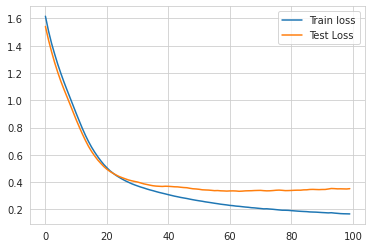

In [79]:
# Visualizar la perdida
plt.plot(history.history['loss'], label='Train loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.legend();

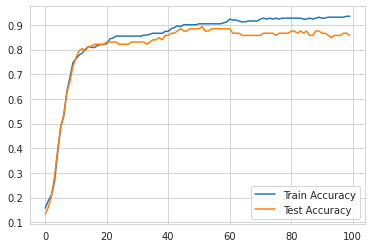

In [80]:
# Visualizar el accuracy
plt.plot(history.history['acc'], label='Train Accuracy')
plt.plot(history.history['val_acc'], label='Test Accuracy')
plt.legend();

In [81]:
model2 = Sequential()
# Primera capa oculta
model2.add(Dense(14, # Cuántas neuronas tienes en tu primera capa oculta
                input_dim = input_shape, # ¿Cuál es la forma de las características de entrada (número de columnas)?
                activation = 'relu')) # ¿Qué función de activación estás usando?
model2.add(Dropout(.3))
# Segunda capa oculta
model2.add(Dense(9, # Cuántas neuronas tienes en tu capa oculta
                activation = 'relu')) # ¿Qué función de activación estás usando?              
model2.add(Dropout(.3))
# Capa de salida
model2.add(Dense(4, activation = 'softmax')) # Cuantas posibilidades de salida tenemos (número de clases que estoy prediciendo)            
# Paso 2: compilar
model2.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['acc'])

In [82]:
history = model2.fit(X_train, y_train,
                    validation_data = (X_test, y_test),
                    epochs = 500)

Epoch 1/500
9/9 [==============================] - 1s 41ms/step - loss: 1.4248 - acc: 0.3180 - val_loss: 1.2863 - val_acc: 0.3661
Epoch 2/500
9/9 [==============================] - 0s 4ms/step - loss: 1.3924 - acc: 0.3525 - val_loss: 1.2465 - val_acc: 0.4018
Epoch 3/500
9/9 [==============================] - 0s 7ms/step - loss: 1.3342 - acc: 0.3640 - val_loss: 1.2072 - val_acc: 0.4464
Epoch 4/500
9/9 [==============================] - 0s 4ms/step - loss: 1.2072 - acc: 0.4598 - val_loss: 1.1688 - val_acc: 0.5179
Epoch 5/500
9/9 [==============================] - 0s 6ms/step - loss: 1.2544 - acc: 0.4636 - val_loss: 1.1339 - val_acc: 0.5982
Epoch 6/500
9/9 [==============================] - 0s 7ms/step - loss: 1.1697 - acc: 0.5249 - val_loss: 1.1029 - val_acc: 0.6250
Epoch 7/500
9/9 [==============================] - 0s 4ms/step - loss: 1.1654 - acc: 0.4904 - val_loss: 1.0726 - val_acc: 0.6518
Epoch 8/500
9/9 [==============================] - 0s 6ms/step - loss: 1.1776 - acc: 0.5211 - va

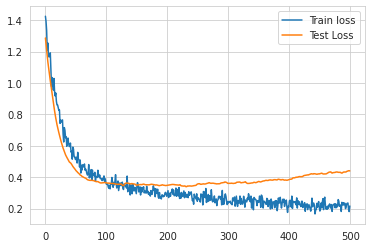

In [83]:
# Visualizar la perdida
plt.plot(history.history['loss'], label='Train loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.legend();

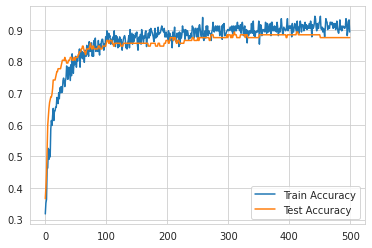

In [84]:
# Visualizar el accuracy
plt.plot(history.history['acc'], label='Train Accuracy')
plt.plot(history.history['val_acc'], label='Test Accuracy')
plt.legend();

In [85]:
model3 = Sequential()
# Primera capa oculta
model3.add(Dense(14, # Cuántas neuronas tienes en tu primera capa oculta
                input_dim = input_shape, # ¿Cuál es la forma de las características de entrada (número de columnas)?
                activation = 'relu',
                kernel_regularizer=l2(0.01))) # ¿Qué función de activación estás usando?
# Segunda capa oculta
model3.add(Dense(9, # Cuántas neuronas tienes en tu capa oculta
                activation = 'relu',
                kernel_regularizer=l2(0.01))) # ¿Qué función de activación estás usando?              
# Capa de salida
model3.add(Dense(4, activation = 'softmax')) # Cuantas posibilidades de salida tenemos (número de clases que estoy prediciendo)            
# Paso 2: compilar
model3.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['acc'])

In [86]:
history = model3.fit(X_train, y_train,
                    validation_data = (X_test, y_test),
                    epochs = 500)

Epoch 1/500
9/9 [==============================] - 1s 24ms/step - loss: 1.5542 - acc: 0.4751 - val_loss: 1.5475 - val_acc: 0.4554
Epoch 2/500
9/9 [==============================] - 0s 7ms/step - loss: 1.5096 - acc: 0.5517 - val_loss: 1.5082 - val_acc: 0.5268
Epoch 3/500
9/9 [==============================] - 0s 7ms/step - loss: 1.4676 - acc: 0.6475 - val_loss: 1.4684 - val_acc: 0.6161
Epoch 4/500
9/9 [==============================] - 0s 4ms/step - loss: 1.4272 - acc: 0.6743 - val_loss: 1.4276 - val_acc: 0.6696
Epoch 5/500
9/9 [==============================] - 0s 4ms/step - loss: 1.3856 - acc: 0.7280 - val_loss: 1.3860 - val_acc: 0.7679
Epoch 6/500
9/9 [==============================] - 0s 4ms/step - loss: 1.3430 - acc: 0.7701 - val_loss: 1.3432 - val_acc: 0.8214
Epoch 7/500
9/9 [==============================] - 0s 4ms/step - loss: 1.2969 - acc: 0.8084 - val_loss: 1.2977 - val_acc: 0.8304
Epoch 8/500
9/9 [==============================] - 0s 4ms/step - loss: 1.2487 - acc: 0.8276 - va

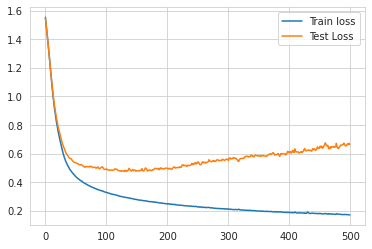

In [87]:
# Visualizar la perdida
plt.plot(history.history['loss'], label='Train loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.legend();

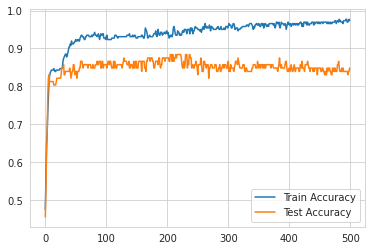

In [88]:
# Visualizar el accuracy
plt.plot(history.history['acc'], label='Train Accuracy')
plt.plot(history.history['val_acc'], label='Test Accuracy')
plt.legend();

In [89]:
model4 = Sequential()
# Primera capa oculta
model4.add(Dense(14, # Cuántas neuronas tienes en tu primera capa oculta
                input_dim = input_shape, # ¿Cuál es la forma de las características de entrada (número de columnas)?
                activation = 'relu',
                kernel_regularizer=l2(0.15))) # ¿Qué función de activación estás usando?
# Segunda capa oculta
model4.add(Dense(9, # Cuántas neuronas tienes en tu capa oculta
                activation = 'relu',
                kernel_regularizer=l2(0.15))) # ¿Qué función de activación estás usando?              
# Capa de salida
model4.add(Dense(4, activation = 'softmax')) # Cuantas posibilidades de salida tenemos (número de clases que estoy prediciendo)            
# Paso 2: compilar
model4.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['acc'])

In [90]:
history = model4.fit(X_train, y_train,
                    validation_data = (X_test, y_test),
                    epochs = 500)

Epoch 1/500
9/9 [==============================] - 1s 21ms/step - loss: 5.3706 - acc: 0.0843 - val_loss: 5.1966 - val_acc: 0.0893
Epoch 2/500
9/9 [==============================] - 0s 4ms/step - loss: 5.1118 - acc: 0.1226 - val_loss: 4.9508 - val_acc: 0.1339
Epoch 3/500
9/9 [==============================] - 0s 8ms/step - loss: 4.8727 - acc: 0.2069 - val_loss: 4.7221 - val_acc: 0.2054
Epoch 4/500
9/9 [==============================] - 0s 4ms/step - loss: 4.6495 - acc: 0.2797 - val_loss: 4.5081 - val_acc: 0.2411
Epoch 5/500
9/9 [==============================] - 0s 6ms/step - loss: 4.4400 - acc: 0.3218 - val_loss: 4.3062 - val_acc: 0.3036
Epoch 6/500
9/9 [==============================] - 0s 4ms/step - loss: 4.2427 - acc: 0.3908 - val_loss: 4.1168 - val_acc: 0.3839
Epoch 7/500
9/9 [==============================] - 0s 5ms/step - loss: 4.0577 - acc: 0.4368 - val_loss: 3.9348 - val_acc: 0.4732
Epoch 8/500
9/9 [==============================] - 0s 6ms/step - loss: 3.8801 - acc: 0.5019 - va

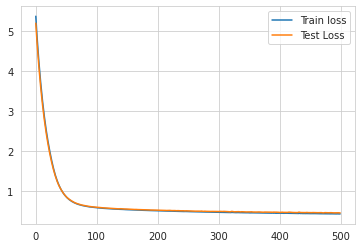

In [91]:
# Visualizar la perdida
plt.plot(history.history['loss'], label='Train loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.legend();

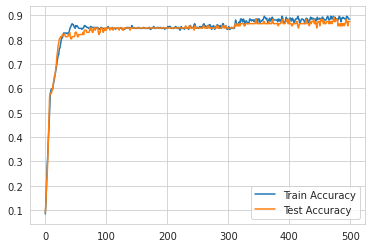

In [92]:
# Visualizar el accuracy
plt.plot(history.history['acc'], label='Train Accuracy')
plt.plot(history.history['val_acc'], label='Test Accuracy')
plt.legend();

In [93]:
model5 = Sequential()
# Primera capa oculta
model5.add(Dense(14, # Cuántas neuronas tienes en tu primera capa oculta
                input_dim = input_shape, # ¿Cuál es la forma de las características de entrada (número de columnas)?
                activation = 'relu',
                kernel_regularizer=l2(0.15)))
model5.add(Dropout(.2))
# Segunda capa oculta
model5.add(Dense(9, # Cuántas neuronas tienes en tu capa oculta
                activation = 'relu',
                kernel_regularizer=l2(0.15)))            
model5.add(Dropout(.2))
# Capa de salida
model5.add(Dense(4, activation = 'softmax')) # Cuantas posibilidades de salida tenemos (número de clases que estoy prediciendo)            
# Paso 2: compilar
model5.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['acc'])

In [94]:
early_stopping = EarlyStopping(patience = 50)
history = model5.fit(X_train, y_train,
                    validation_data = (X_test, y_test), 
                    epochs=10000,
                    callbacks = [early_stopping])

Epoch 1/10000
9/9 [==============================] - 1s 24ms/step - loss: 5.1809 - acc: 0.1992 - val_loss: 4.9917 - val_acc: 0.2411
Epoch 2/10000
9/9 [==============================] - 0s 5ms/step - loss: 4.9861 - acc: 0.2375 - val_loss: 4.7697 - val_acc: 0.2946
Epoch 3/10000
9/9 [==============================] - 0s 4ms/step - loss: 4.7215 - acc: 0.3448 - val_loss: 4.5612 - val_acc: 0.3393
Epoch 4/10000
9/9 [==============================] - 0s 6ms/step - loss: 4.5137 - acc: 0.3180 - val_loss: 4.3661 - val_acc: 0.4018
Epoch 5/10000
9/9 [==============================] - 0s 4ms/step - loss: 4.3298 - acc: 0.4100 - val_loss: 4.1837 - val_acc: 0.4018
Epoch 6/10000
9/9 [==============================] - 0s 4ms/step - loss: 4.1482 - acc: 0.4598 - val_loss: 4.0123 - val_acc: 0.4732
Epoch 7/10000
9/9 [==============================] - 0s 6ms/step - loss: 3.9805 - acc: 0.4751 - val_loss: 3.8499 - val_acc: 0.5268
Epoch 8/10000
9/9 [==============================] - 0s 6ms/step - loss: 3.8121 - 

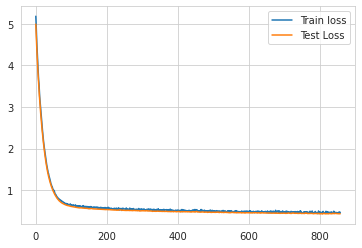

In [95]:
# Visualizar la perdida
plt.plot(history.history['loss'], label='Train loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.legend();

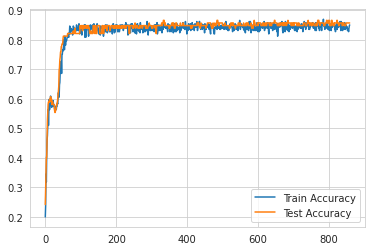

In [96]:
# Visualizar el accuracy
plt.plot(history.history['acc'], label='Train Accuracy')
plt.plot(history.history['val_acc'], label='Test Accuracy')
plt.legend();